In [1]:
# !pip install autokeras==1.0.19 --no-deps
# !pip install tables

In [2]:
import tensorflow as tf
import autokeras as ak

import pandas as pd 
import numpy as np 
import os 

from PIL import Image

from sklearn.model_selection import train_test_split

In [3]:
tf.__version__

'2.10.0'

In [4]:
df = pd.read_hdf('training_data/image_arr.h5')

In [5]:
df.fillna(0, inplace=True)

In [6]:
df.head()

,img_arr,crs:Temperature,crs:Tint,crs:Exposure2012,crs:Contrast2012,crs:Highlights2012,crs:Shadows2012,crs:Whites2012,crs:Blacks2012,crs:Texture,...,crs:GrainSize,crs:GrainFrequency,crs:PostCropVignetteAmount,crs:ShadowTint,crs:RedHue,crs:RedSaturation,crs:GreenHue,crs:GreenSaturation,crs:BlueHue,crs:BlueSaturation
0Y6A9643,"[[[1, 0, 1], [1, 0, 1], [1, 0, 1], [1, 0, 1], ...",5484.0,-7.0,2.00,13.0,-76.0,-21.0,0.0,-51.0,0.0,...,41.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5D4_7260,"[[[1, 0, 2], [1, 0, 2], [0, 0, 2], [0, 0, 2], ...",3686.0,2.0,1.50,13.0,-41.0,4.0,0.0,-28.0,0.0,...,41.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MJB_1777,"[[[1, 1, 4], [1, 1, 5], [1, 1, 5], [1, 1, 5], ...",4137.0,-5.0,2.50,5.0,-9.0,-5.0,-39.0,-12.0,0.0,...,41.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5D4_3356,"[[[3, 1, 2], [2, 1, 2], [10, 1, 2], [82, 6, 9]...",3686.0,-5.0,2.10,-9.0,-68.0,-41.0,-14.0,-51.0,0.0,...,41.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DSC01457,"[[[3, 2, 4], [4, 2, 4], [3, 2, 3], [3, 2, 4], ...",2000.0,-21.0,2.05,13.0,-24.0,-21.0,0.0,-51.0,0.0,...,41.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# df_train = df[['img_arr','crs:Temperature']]

X = df['img_arr'].values
y = df.drop(columns=['img_arr'])
columns = y.columns
# y = df.values

In [8]:
y

,crs:Temperature,crs:Tint,crs:Exposure2012,crs:Contrast2012,crs:Highlights2012,crs:Shadows2012,crs:Whites2012,crs:Blacks2012,crs:Texture,crs:Clarity2012,...,crs:GrainSize,crs:GrainFrequency,crs:PostCropVignetteAmount,crs:ShadowTint,crs:RedHue,crs:RedSaturation,crs:GreenHue,crs:GreenSaturation,crs:BlueHue,crs:BlueSaturation
0Y6A9643,5484.0,-7.0,2.00,13.0,-76.0,-21.0,0.0,-51.0,0.0,6.0,...,41.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5D4_7260,3686.0,2.0,1.50,13.0,-41.0,4.0,0.0,-28.0,0.0,6.0,...,41.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MJB_1777,4137.0,-5.0,2.50,5.0,-9.0,-5.0,-39.0,-12.0,0.0,6.0,...,41.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5D4_3356,3686.0,-5.0,2.10,-9.0,-68.0,-41.0,-14.0,-51.0,0.0,6.0,...,41.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DSC01457,2000.0,-21.0,2.05,13.0,-24.0,-21.0,0.0,-51.0,0.0,6.0,...,41.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5D4_3206,4291.0,2.0,2.95,-39.0,-68.0,-24.0,0.0,-38.0,0.0,6.0,...,41.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MJB_1119,5509.0,18.0,0.30,4.0,-36.0,41.0,-38.0,-39.0,0.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0Y6A1943,3686.0,-5.0,1.65,13.0,-64.0,42.0,0.0,-40.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DSC01737,3217.0,-7.0,2.30,13.0,-76.0,-21.0,0.0,-51.0,0.0,6.0,...,41.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
X = np.stack(X)
X.shape

(1674, 250, 250, 3)

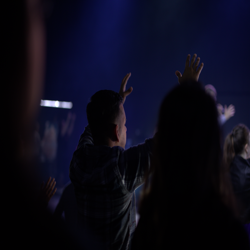

In [10]:
Image.fromarray(X[0])

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.4)

In [12]:
print(x_train.shape)
print(y_train.shape)

(1004, 250, 250, 3)
(1004, 97)


In [13]:
# Initialize the image regressor.
reg = ak.ImageRegressor(
    overwrite=False, 
    max_trials=5,
    project_name='ak_image_regressor'
)
# Feed the image regressor with training data.
reg.fit(x_train, y_train)

Trial 5 Complete [00h 17m 23s]
val_loss: 12313.21484375

Best val_loss So Far: 12313.21484375
Total elapsed time: 01h 44m 47s
INFO:tensorflow:Oracle triggered exit
Epoch 1/87


2023-03-14 13:06:49.155890: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 12s 312ms/step - loss: 112411.0000 - mean_squared_error: 112411.0000
Epoch 2/87
32/32 [==============================] - 10s 301ms/step - loss: 40137.1328 - mean_squared_error: 40137.1328
Epoch 3/87
32/32 [==============================] - 10s 298ms/step - loss: 22690.5332 - mean_squared_error: 22690.5332
Epoch 4/87
32/32 [==============================] - 10s 300ms/step - loss: 18327.6836 - mean_squared_error: 18327.6836
Epoch 5/87
32/32 [==============================] - 10s 299ms/step - loss: 17086.0527 - mean_squared_error: 17086.0527
Epoch 6/87
32/32 [==============================] - 10s 297ms/step - loss: 16592.0059 - mean_squared_error: 16592.0059
Epoch 7/87
32/32 [==============================] - 9s 293ms/step - loss: 16281.8408 - mean_squared_error: 16281.8408
Epoch 8/87
32/32 [==============================] - 9s 294ms/step - loss: 16022.2959 - mean_squared_error: 16022.2959
Epoch 9/87
32/32 [==============================] - 10s 298

INFO:tensorflow:Assets written to: ./ak_image_regressor/best_model/assets


INFO:tensorflow:Assets written to: ./ak_image_regressor/best_model/assets


In [14]:
# Evaluate the best model with testing data.
reg.evaluate(x_test, y_test)

2023-03-14 13:21:47.547641: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 6s 242ms/step - loss: 13566.0869 - mean_squared_error: 13566.0869


[13566.0869140625, 13566.0869140625]

In [15]:
# Predict with the best model.
y_predict = reg.predict(x_test)

2023-03-14 13:22:07.558631: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 4s 213ms/step


In [16]:
y_predict

array([[ 3.8968843e+03,  6.3043575e+00, -6.7659652e-01, ...,
         2.4619148e+00, -1.2650658e+00, -3.0008259e+00],
       [ 2.9489419e+03,  7.7788677e+00, -1.8608601e-01, ...,
         1.9222894e+00, -1.8043026e+00, -2.9121475e+00],
       [ 3.5738303e+03,  2.9174011e+00, -8.8893175e-01, ...,
         2.9154081e+00,  2.9152257e+00, -3.8182437e-01],
       ...,
       [ 3.1425413e+03,  8.6605015e+00,  3.6274219e+00, ...,
         1.9648033e+00, -1.2043319e+00, -2.3296289e+00],
       [ 3.2029543e+03,  2.5558331e+00,  2.3172593e+00, ...,
         2.5128239e-01,  1.2602407e-01,  6.5516949e-01],
       [ 4.4594888e+03,  5.7524145e-01,  8.6405396e-01, ...,
         2.4714539e+00,  2.6239440e+00, -8.6706525e-01]], dtype=float32)

In [17]:
pd.DataFrame(y_predict, columns=columns).head()

,crs:Temperature,crs:Tint,crs:Exposure2012,crs:Contrast2012,crs:Highlights2012,crs:Shadows2012,crs:Whites2012,crs:Blacks2012,crs:Texture,crs:Clarity2012,...,crs:GrainSize,crs:GrainFrequency,crs:PostCropVignetteAmount,crs:ShadowTint,crs:RedHue,crs:RedSaturation,crs:GreenHue,crs:GreenSaturation,crs:BlueHue,crs:BlueSaturation
0,3896.884277,6.304358,-0.676597,0.420316,-33.590401,11.445706,-21.447344,-16.965883,4.416203,5.462600,...,31.714855,32.098526,-1.221696,1.434171,-1.675138,1.460465,2.274155,2.461915,-1.265066,-3.000826
1,2948.941895,7.778868,-0.186086,8.652288,-24.161869,12.171888,-8.379332,-12.069130,0.017337,1.249054,...,23.882963,20.615349,-0.420533,-0.119832,-1.957345,2.263272,-4.032880,1.922289,-1.804303,-2.912148
2,3573.830322,2.917401,-0.888932,12.070224,-54.793434,-3.426868,-10.703631,-23.159832,4.373856,11.041704,...,29.519524,35.925682,-1.191324,-2.527844,1.266438,4.008658,1.070685,2.915408,2.915226,-0.381824
3,5448.398926,5.374145,-0.146786,18.372196,-53.453003,-0.568345,-10.791203,-19.457121,5.091312,14.267039,...,35.609814,36.987186,-6.873668,-0.548929,-2.898904,-1.174073,3.975045,-0.424924,0.067354,-1.457666
4,4035.474121,6.763354,0.207647,14.768814,-62.791161,7.705817,-11.426254,-16.954067,5.599449,11.372178,...,17.382210,24.044952,2.050370,-3.064744,0.154553,13.891998,6.821143,1.377855,1.260038,0.901795


In [18]:
y_test

,crs:Temperature,crs:Tint,crs:Exposure2012,crs:Contrast2012,crs:Highlights2012,crs:Shadows2012,crs:Whites2012,crs:Blacks2012,crs:Texture,crs:Clarity2012,...,crs:GrainSize,crs:GrainFrequency,crs:PostCropVignetteAmount,crs:ShadowTint,crs:RedHue,crs:RedSaturation,crs:GreenHue,crs:GreenSaturation,crs:BlueHue,crs:BlueSaturation
MJB_2128,3587.0,-5.0,0.30,5.0,-9.0,-5.0,-39.0,-12.0,0.0,6.0,...,41.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5D4_7237,3686.0,2.0,1.50,13.0,-41.0,4.0,0.0,-28.0,0.0,6.0,...,41.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5D4_7475,3130.0,7.0,1.95,13.0,-76.0,-2.0,0.0,-51.0,0.0,6.0,...,41.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MJB_1080,9086.0,-7.0,0.50,33.0,-71.0,-21.0,29.0,-14.0,0.0,6.0,...,41.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0Y6A9652,5233.0,-7.0,0.05,33.0,-76.0,18.0,0.0,-14.0,0.0,6.0,...,41.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5D4_9068,4177.0,-86.0,1.80,13.0,-76.0,-21.0,0.0,-51.0,0.0,6.0,...,41.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MJB_1528,7263.0,3.0,1.05,26.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5D4_7037,3754.0,18.0,-0.25,8.0,-96.0,35.0,-17.0,-33.0,0.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MJB_1161,4805.0,27.0,0.90,-42.0,-20.0,-30.0,-7.0,-34.0,9.0,10.0,...,26.0,50.0,0.0,-2.0,14.0,45.0,95.0,-15.0,6.0,-25.0


In [19]:
model = reg.export_model()
print(type(model))

<class 'keras.engine.functional.Functional'>


In [20]:
try:
    model.save('models/model_autokeras_reg', save_format='tf')
except:
    model.save('models/model_autokeras_reg.h5')

INFO:tensorflow:Assets written to: models/model_autokeras_reg/assets


INFO:tensorflow:Assets written to: models/model_autokeras_reg/assets


In [21]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 cast_to_float32 (CastToFloa  (None, 250, 250, 3)      0         
 t32)                                                            
                                                                 
 random_flip (RandomFlip)    (None, 250, 250, 3)       0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 regression_head_1 (Dense)   (None, 97)                12714081  
                                                             